In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

In [2]:
ct = np.linspace(-0.999,0.999,100)

Yukawa Potential
======

Trying the change of reference frame with scattering from the Yukawa potential.

In [3]:
mu = 1
ki = 0.5

In [4]:
def alpha(lam=1):
    return 2*lam/(lam+1)**2

def coslab(lam=1,ct=1.0):
    return (ct+lam)/np.sqrt(1+2*lam*ct+lam**2)

def jacobian(lam=1,ct=1.0):
    return (1+2*lam*ct+lam**2)**(3/2)/(np.abs(1+lam*ct)) #regularize denomonator by adding epsilon=1e-6

In [5]:
def dsigCM(ct=1.0):
    return 1/(mu**2+2*ki**2*(1-ct))**2

def kiLAB(lam=1):
    return ki*(lam+1)

def kfLAB(lam=1,ct=1.0):
    return kiLAB(lam)*np.sqrt(1-alpha(lam)*(1-ct))

def dsigLAB(lam=1,ct=1.0):
    return np.sqrt(1-alpha(lam)+alpha(lam)*ct)*(1/(mu**2+kfLAB(lam,ct)**2+kiLAB(lam)**2-2*kiLAB(lam)*kfLAB(lam,ct)*coslab(lam,ct))**2)

In [6]:
print(dsigLAB(1,ct))

[0.00559297 0.0260027  0.0367082  0.04523674 0.05266707 0.05942204
 0.06571907 0.07168739 0.07741121 0.08294908 0.08834371 0.09362751
 0.09882577 0.10395879 0.10904322 0.11409297 0.11911983 0.12413402
 0.12914444 0.13415901 0.1391848  0.14422823 0.14929518 0.15439108
 0.15952098 0.16468965 0.16990159 0.17516109 0.18047228 0.18583914
 0.19126556 0.19675531 0.20231212 0.20793964 0.2136415  0.21942132
 0.22528269 0.23122921 0.2372645  0.2433922  0.24961599 0.25593958
 0.26236674 0.26890128 0.2755471  0.28230817 0.28918852 0.2961923
 0.30332371 0.31058711 0.31798692 0.32552771 0.33321415 0.34105107
 0.34904341 0.35719629 0.36551496 0.37400484 0.38267153 0.39152083
 0.40055869 0.40979129 0.41922503 0.42886651 0.43872259 0.44880034
 0.45910713 0.46965057 0.48043856 0.49147932 0.50278136 0.51435353
 0.52620502 0.53834539 0.55078458 0.56353294 0.57660121 0.59000061
 0.60374282 0.61783999 0.63230481 0.64715051 0.66239087 0.6780403
 0.69411384 0.7106272  0.72759678 0.74503976 0.76297408 0.781418

In [7]:
print(dsigCM(ct))

[0.25012505 0.25266891 0.25525178 0.25787445 0.26053776 0.26324254
 0.26598965 0.26878    0.27161448 0.27449404 0.27741964 0.28039226
 0.28341292 0.28648265 0.28960252 0.29277364 0.29599713 0.29927416
 0.3026059  0.3059936  0.3094385  0.31294191 0.31650515 0.3201296
 0.32381666 0.3275678  0.33138449 0.33526828 0.33922075 0.34324352
 0.34733828 0.35150675 0.35575072 0.36007201 0.36447252 0.36895419
 0.37351904 0.37816913 0.3829066  0.38773366 0.39265257 0.39766568
 0.40277541 0.40798427 0.41329483 0.41870975 0.42423179 0.4298638
 0.43560871 0.44146956 0.4474495  0.45355176 0.45977971 0.46613683
 0.47262671 0.47925307 0.48601978 0.49293081 0.49999031 0.50720255
 0.51457198 0.52210319 0.52980096 0.53767024 0.54571615 0.55394403
 0.5623594  0.57096801 0.5797758  0.58878899 0.598014   0.60745752
 0.61712652 0.62702822 0.63717015 0.64756015 0.65820637 0.66911731
 0.68030182 0.69176912 0.70352882 0.71559096 0.72796599 0.74066483
 0.75369887 0.76708002 0.78082071 0.79493394 0.8094333  0.824333

In [8]:
print(jacobian(1e-6,ct)*dsigCM(ct)/dsigLAB(1e-6,ct))

[1.         1.00000002 1.00000004 1.00000006 1.00000008 1.0000001
 1.00000012 1.00000014 1.00000016 1.00000018 1.0000002  1.00000022
 1.00000024 1.00000026 1.00000028 1.0000003  1.00000032 1.00000034
 1.00000036 1.00000038 1.0000004  1.00000042 1.00000045 1.00000047
 1.00000049 1.00000051 1.00000053 1.00000055 1.00000057 1.00000059
 1.00000061 1.00000063 1.00000065 1.00000067 1.00000069 1.00000071
 1.00000073 1.00000075 1.00000077 1.00000079 1.00000081 1.00000083
 1.00000085 1.00000087 1.00000089 1.00000091 1.00000093 1.00000095
 1.00000097 1.00000099 1.00000101 1.00000103 1.00000105 1.00000107
 1.00000109 1.00000111 1.00000113 1.00000115 1.00000117 1.00000119
 1.00000121 1.00000123 1.00000125 1.00000127 1.00000129 1.00000131
 1.00000133 1.00000135 1.00000137 1.00000139 1.00000141 1.00000143
 1.00000145 1.00000147 1.00000149 1.00000151 1.00000153 1.00000156
 1.00000158 1.0000016  1.00000162 1.00000164 1.00000166 1.00000168
 1.0000017  1.00000172 1.00000174 1.00000176 1.00000178 1.00000

In [9]:
print(jacobian(1,ct))

[0.08944272 0.41164857 0.57524698 0.70168628 0.80859024 0.90292454
 0.98829513 1.06685604 1.14001595 1.20875593 1.27379176 1.33566463
 1.39479552 1.45151958 1.50610877 1.55878741 1.60974306 1.6591345
 1.70709748 1.75374923 1.79919174 1.84351443 1.88679623 1.92910719
 1.97050986 2.01106033 2.05080915 2.08980208 2.12808065 2.16568276
 2.20264304 2.23899328 2.27476272 2.30997835 2.34466512 2.37884617
 2.41254298 2.44577558 2.47856263 2.5109216  2.54286882 2.57441962
 2.6055884  2.63638871 2.66683333 2.69693429 2.72670297 2.75615015
 2.78528601 2.81412024 2.842662   2.87092003 2.89890261 2.92661766
 2.95407269 2.9812749  3.00823113 3.03494796 3.06143163 3.08768816
 3.11372329 3.13954253 3.16515115 3.19055424 3.21575666 3.2407631
 3.26557805 3.29020585 3.31465067 3.33891654 3.36300731 3.38692674
 3.41067842 3.43426583 3.45769235 3.4809612  3.50407555 3.52703842
 3.54985275 3.57252139 3.5950471  3.61743254 3.63968031 3.6617929
 3.68377277 3.70562226 3.72734368 3.74893924 3.77041112 3.7917614

In [10]:
print(jacobian(1,ct)*dsigCM(ct))

[0.02237186 0.10401079 0.14683281 0.18094696 0.21066829 0.23768815
 0.26287628 0.28674957 0.30964484 0.33179631 0.35337485 0.37451002
 0.39530306 0.41583517 0.4361729  0.45637187 0.47647933 0.49653608
 0.51657778 0.53663604 0.55673919 0.57691292 0.59718072 0.61756431
 0.63808393 0.6587586  0.67960634 0.70064434 0.72188911 0.74335658
 0.76506225 0.78702126 0.80924847 0.83175855 0.85456601 0.87768527
 0.90113074 0.92491683 0.949058   0.97356882 0.99846397 1.02375833
 1.04946695 1.07560512 1.10218842 1.12923268 1.15675409 1.18476918
 1.21329485 1.24234843 1.27194768 1.30211083 1.33285661 1.36420428
 1.39617366 1.42878516 1.46205982 1.49601935 1.53068614 1.5660833
 1.60223475 1.63916517 1.67690013 1.71546606 1.75489035 1.79520137
 1.83642852 1.87860227 1.92175426 1.96591729 2.01112545 2.05741413
 2.10482009 2.15338158 2.20313834 2.25413174 2.30640484 2.36000245
 2.41497128 2.47135997 2.52921926 2.58860203 2.64956348 2.71216121
 2.77645537 2.84250879 2.91038713 2.98015904 3.0518963  3.12567

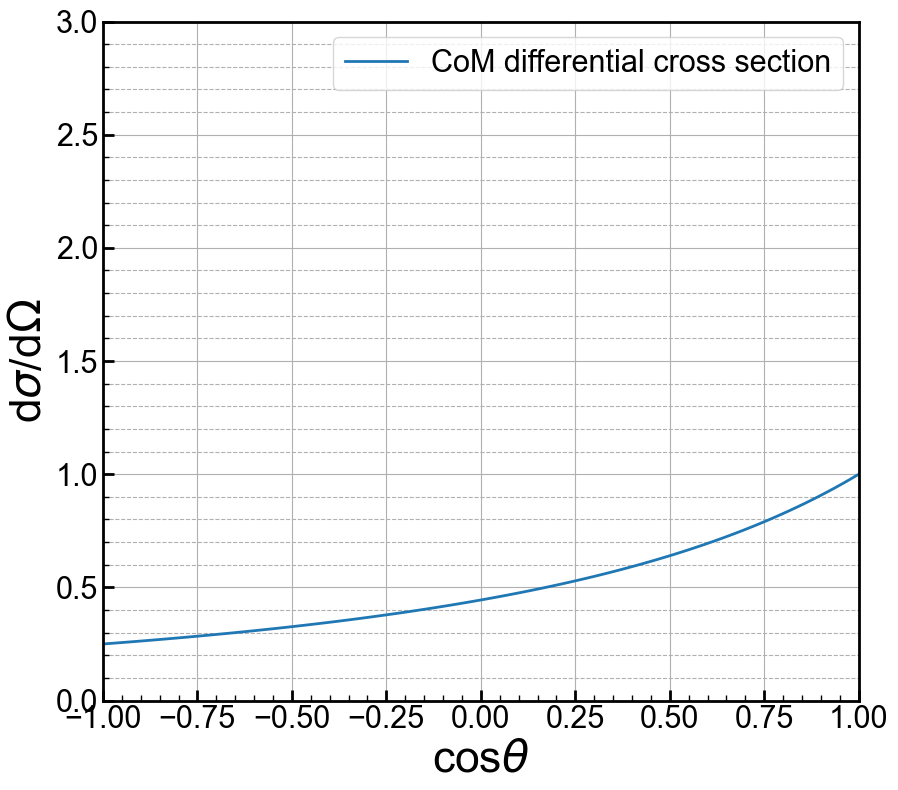

In [11]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


#print(estring)
ax1.plot(ct, dsigCM(ct),label='CoM differential cross section')


ymin = 0
ymax = 3

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(-1, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'cos$\theta$')
ax1.set_ylabel('d$\sigma$/d$\Omega$')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/heflux.pdf')
plt.show()

In [12]:
#root finding
from scipy import optimize
def ctcm(ctl,lam=1):
    if np.shape(ctl)==(): 
      f = lambda x: ((x+lam)/np.sqrt(1+2*lam*x+lam**2))-ctl
      sol = optimize.root_scalar(f, bracket=[-1, 1], method='brentq')
      return sol.root
    else:
      rt = np.zeros(np.shape(ctl))
      for i,c in enumerate(ctl):
        f = lambda x: ((x+lam)/np.sqrt(1+2*lam*x+lam**2))-ctl[i]
        sol = optimize.root_scalar(f, bracket=[-1, 1], method='brentq')
        rt[i]=sol.root
      return rt

In [13]:
print(ctcm([0.5,0.9],0.5))

[0.07569391 0.78336496]


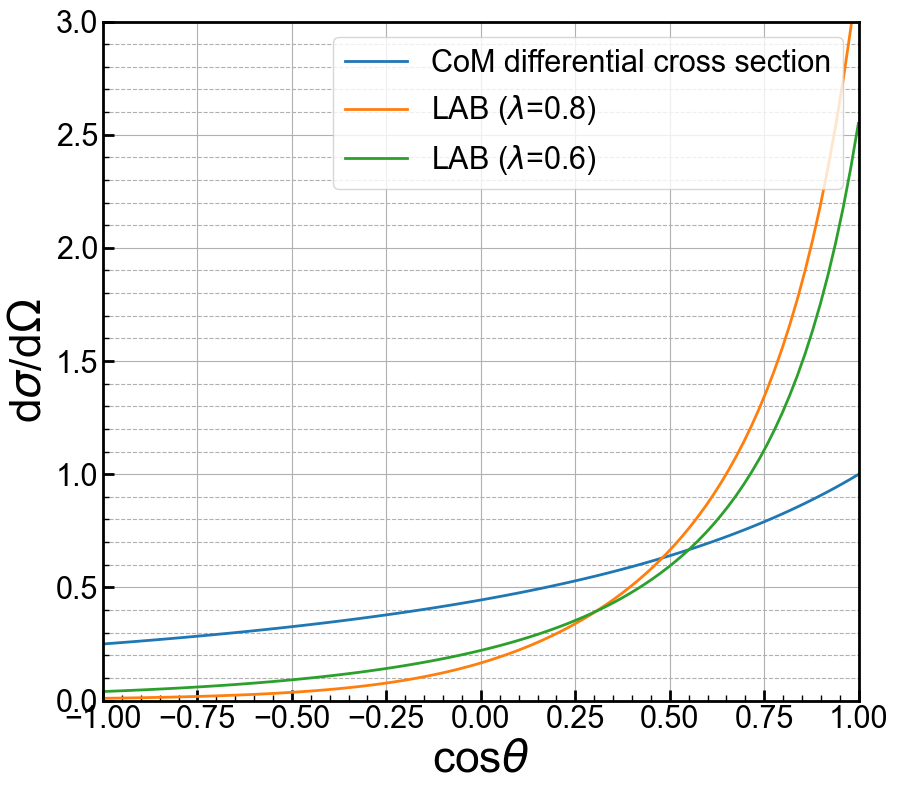

In [14]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


#print(estring)
l=0.8
l1=0.6
ax1.plot(ct, dsigCM(ct),label='CoM differential cross section')
ax1.plot(ct, dsigCM(ctcm(ct,l))*jacobian(l,ctcm(ct,l)),label='LAB ($\lambda$={})'.format(l))
ax1.plot(ct, dsigCM(ctcm(ct,l))*jacobian(l1,ctcm(ct,l1)),label='LAB ($\lambda$={})'.format(l1))


ymin = 0
ymax = 3

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(-1, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'cos$\theta$')
ax1.set_ylabel('d$\sigma$/d$\Omega$')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/labcm_transform.png')
plt.show()

In [15]:
#make some functions and integrate em
from scipy.integrate import quad
g = lambda x: dsigCM(x)
h = lambda x: dsigCM(ctcm(x,0.8))*jacobian(0.8,ctcm(x,0.8))
p = lambda x: dsigCM(ctcm(x,0.6))*jacobian(0.6,ctcm(x,0.6))

print(quad(g,-1,1,epsrel=1e-12))
print(quad(h,-1,1,epsrel=1e-12))
print(quad(p,-1,1,epsrel=1e-12))

(0.9999999999999999, 1.1102230246251564e-14)
(0.9999999999999877, 5.220753582194089e-12)
(1.0000000000000566, 9.788615594540615e-09)


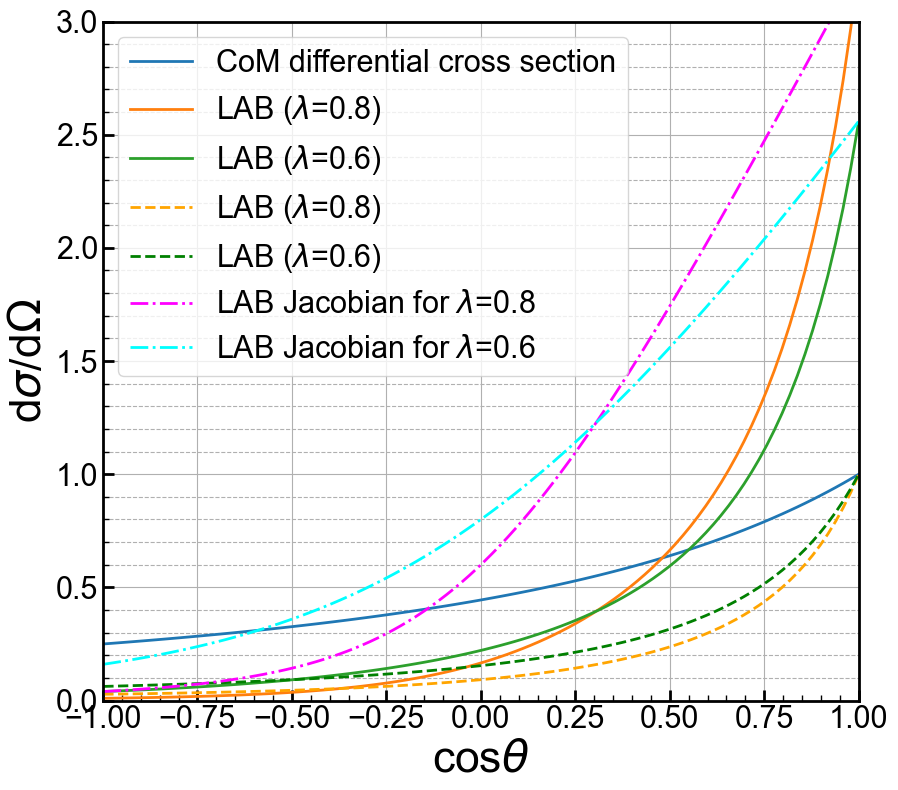

In [16]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


#print(estring)
l=0.8
l1=0.6
ax1.plot(ct, dsigCM(ct),label='CoM differential cross section')
ax1.plot(ct, dsigCM(ctcm(ct,l))*jacobian(l,ctcm(ct,l)),label='LAB ($\lambda$={})'.format(l))
ax1.plot(ct, dsigCM(ctcm(ct,l))*jacobian(l1,ctcm(ct,l1)),label='LAB ($\lambda$={})'.format(l1))
ax1.plot(ct, dsigLAB(l,ctcm(ct,l)),color='orange',linestyle='--',label='LAB ($\lambda$={})'.format(l))
ax1.plot(ct, dsigLAB(l1,ctcm(ct,l1)),color='green',linestyle='--',label='LAB ($\lambda$={})'.format(l1))
ax1.plot(ct, jacobian(l,ctcm(ct,l)),color='magenta',linestyle='-.',label='LAB Jacobian for $\lambda$={}'.format(l))
ax1.plot(ct, jacobian(l1,ctcm(ct,l1)),color='cyan',linestyle='-.',label='LAB Jacobian for $\lambda$={}'.format(l1))


ymin = 0
ymax = 3

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(-1, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'cos$\theta$')
ax1.set_ylabel('d$\sigma$/d$\Omega$')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=2,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/heflux.pdf')
plt.savefig('figures/labcm_jacobian.png')
plt.show()